# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [39]:
import os
current_dir = os.getcwd()
current_dir

'c:\\DA Dev\\Team_2_Healthcare_Insurance_Project'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [40]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [41]:
current_dir = os.getcwd()
current_dir

'c:\\DA Dev'

In [42]:
from pathlib import Path # load the pathlib library

import pandas as pd # load the pandas library
df = pd.read_csv('data/raw/insurance.csv') # read the csv file into a dataframe
df.head() # displays the first first few rows of dataframe
print(df.shape)  # look at shape of dataframe


FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/insurance.csv'

# Section 1

Section 1 content

Import Libraries

In [ ]:
import numpy as np # load the numpy library
df.dtypes # check the data types of each column

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

---

Listing all the variable 

In [ ]:
df.describe(include='all') # get summary statistics of dataframe

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Check for missing values

In [ ]:
#check for missing values
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

check for duplicates

In [ ]:
#check for duplicates
duplicate = df.duplicated().sum()
duplicate

1

Remove Duplicates and checking

In [ ]:
#remove duplicates
df = df.drop_duplicates().reset_index(drop=True)

duplicatech = df.duplicated().sum() #check that duplicates are gone
duplicatech

0

Check for NAN

In [ ]:
#check for nans
df.isna().sum() #



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no NANs in the data set

Normalise the data to make sure that all the categories will be consistent


Expect that there are Male and female are recorded correctly for sex and the spellings and spaces are correct
Expect that the regions are spelt consistently and spaces etc are consistent
Expect that the smoking is Yes or no and the spelling are consistent


In [ ]:
# check male and female is spelt correctly 
df["sex"] = df["sex"].str.strip().str.lower()


# check region is spelt correctly 
df["region"] = df["region"].str.strip().str.lower() #  can also do this  print(df['region'].unique()) and id all unique don't need to strip


# check smoking is set to yes or no
df["smoker"] = df["smoker"].str.strip().str.lower()






# Values count

In [ ]:
# value counts
df["sex"].value_counts()




sex
male      675
female    662
Name: count, dtype: int64

In [ ]:
df["region"].value_counts()


region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [ ]:
df["smoker"].value_counts()


smoker
no     1063
yes     274
Name: count, dtype: int64

In [ ]:
df["children"].value_counts()


children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [ ]:
df["age"].value_counts()


age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

In [ ]:
df["bmi"].value_counts()


bmi
32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: count, Length: 548, dtype: int64

In [ ]:
df["charges"].value_counts()

charges
16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

Histogram of all variables to show shapes

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

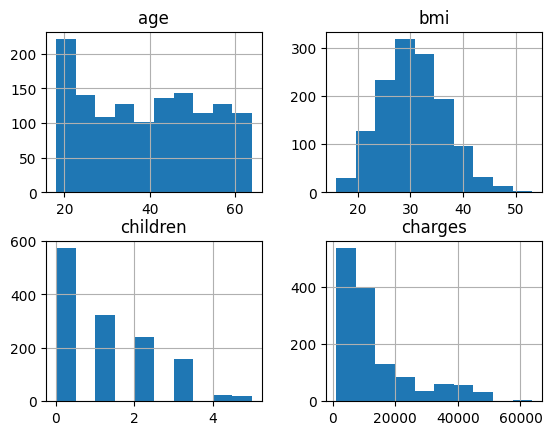

In [ ]:
df.hist()

#Summary 

Age is an uniform distribution there is a single peak to the left

BMI has a normal distribution according with some high values greater than 45.

Charges are strongly skewed to the right - most charges appear to be under 15K according to the histogram

For children most people have three or under

In [ ]:
"""
Since 'bmi' is a continuous variable create function for BMI category groupings can categorize it into groups for better analysis. Category data taken from https://www.cdc.gov/
"""
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi >= 18.5 and bmi < 25:
        return 'Normal weight'
    elif bmi >= 25 and bmi < 30:
        return 'Overweight'
    elif bmi >=30 and bmi < 35:
        return 'Obesity I'
    elif bmi >= 35 and bmi < 40:
        return 'Obesity II'
    else:
        return 'Obesity III'
    
# apply the function to my dataset
df['bmi_category'] = df['bmi'].apply(bmi_category)

# set medical order to bmi to help clarity of seeing impact of each medical category
bmi_order = [
    'Underweight',
    'Normal weight',
    'Overweight',
    'Obesity I',
    'Obesity II',
    'Obesity III'
]

In [ ]:
df['bmi_category'].value_counts().sort_index()

bmi_category
Normal weight    225
Obesity I        390
Obesity II       225
Obesity III       91
Overweight       386
Underweight       20
Name: count, dtype: int64

In [ ]:
grouped = df.groupby(['bmi_category', 'smoker'], observed=True)['charges'].mean()
print(grouped)

bmi_category   smoker
Normal weight  no         7685.656014
               yes       19942.223641
Obesity I      no         8553.954038
               yes       39640.592893
Obesity II     no         9670.440600
               yes       42753.622873
Obesity III    no         8179.664367
               yes       45467.786146
Overweight     no         8257.961955
               yes       22495.874163
Underweight    no         5532.992453
               yes       18809.824980
Name: charges, dtype: float64


In [ ]:
# Group and calculate mean charges by bmi_category and smoker
pivot = df.groupby(['bmi_category', 'smoker'], observed=True)['charges'].mean().unstack()
	
# 2. Calculate difference and percent difference (numeric)
pivot['difference'] = pivot['yes'] - pivot['no']
pivot['percent_diff'] = (pivot['difference'] / pivot['no']) * 100
	
# 3. Format the currency columns
pivot['no'] = pivot['no'].map(lambda x: f"£{x:,.0f}")
pivot['yes'] = pivot['yes'].map(lambda x: f"£{x:,.0f}")
pivot['difference'] = pivot['difference'].map(lambda x: f"£{x:,.0f}")

# 4. Format the percent difference column
pivot['percent_diff'] = pivot['percent_diff'].map(lambda x: f"{x:.1f}%")
print(pivot)


smoker             no      yes difference percent_diff
bmi_category                                          
Normal weight  £7,686  £19,942    £12,257       159.5%
Obesity I      £8,554  £39,641    £31,087       363.4%
Obesity II     £9,670  £42,754    £33,083       342.1%
Obesity III    £8,180  £45,468    £37,288       455.9%
Overweight     £8,258  £22,496    £14,238       172.4%
Underweight    £5,533  £18,810    £13,277       240.0%


Focus on 'BMI' and 'Age' as a factor in Healthcare cost

In [ ]:
grouped = df.groupby(['bmi_category', 'age'], observed=True)['charges'].mean().reset_index()

grouped['charges'] = grouped['charges'].map(lambda x: f"£{x:,.0f}")

print(grouped)



      bmi_category  age  charges
0    Normal weight   18   £4,852
1    Normal weight   19   £2,622
2    Normal weight   20  £15,742
3    Normal weight   21   £4,526
4    Normal weight   22   £3,142
..             ...  ...      ...
240    Underweight   39  £19,023
241    Underweight   51   £9,644
242    Underweight   52   £9,991
243    Underweight   57  £11,535
244    Underweight   60  £13,204

[245 rows x 3 columns]


Convert from Long to Wide format for better reading and understanding of Dataset

In [ ]:
pivot_table = pd.pivot_table(
	    df,
	    values='charges',               # Column to aggregate
	    index='bmi_category',          # Rows
	    columns='age',                 # Columns
	    aggfunc='mean',                # Aggregation function
	    fill_value=0                   # Replace missing values with 0
).reset_index().rename_axis(mapper=None, axis=1)
age_cols = pivot_table.columns.drop('bmi_category')

pivot_table[age_cols] = pivot_table[age_cols].map(lambda x: f"£{x:,.0f}")
print(pivot_table)

    bmi_category      18       19       20      21       22       23       24  \
0  Normal weight  £4,852   £2,622  £15,742  £4,526   £3,142  £12,642   £8,213   
1      Obesity I  £7,977  £18,791   £5,009  £7,666   £9,805  £14,642  £12,752   
2     Obesity II  £8,452   £6,896  £27,091  £1,883  £19,473  £12,007   £2,234   
3    Obesity III  £6,903  £20,741   £1,984      £0  £44,501  £15,060  £38,126   
4     Overweight  £6,206   £8,824   £7,651  £4,563   £2,152   £9,464   £9,478   
5    Underweight  £7,262   £1,675       £0  £2,876       £0   £2,775       £0   

        25      26  ...       55       56       57       58       59       60  \
0   £8,363  £3,104  ...  £10,792  £16,495  £13,809  £11,590  £19,001  £12,820   
1  £13,045  £8,048  ...  £15,549  £20,011  £16,449  £12,301  £18,212  £34,058   
2   £2,534  £2,323  ...  £21,242  £11,599  £12,646  £17,613  £24,515  £19,887   
3  £21,077  £3,180  ...  £12,486  £10,848  £20,702  £17,804  £48,970  £48,674   
4   £5,201  £7,089  ...  £1

In [ ]:
# Define buckets and labels for age bands

bins   = [-float("inf"), 18, 26, 35, 50, 70, 80, float("inf")]
labels = ["<18", "18-25", "26-34", "35-49", "50-69", "70-79", "80+"]

# create age buckets 
df["age_band"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)
df.head() # displays the first first few rows of dataframe

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_band
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,18-25
1,18,male,33.770,1,no,southeast,1725.55230,Obesity I,18-25
2,28,male,33.000,3,no,southeast,4449.46200,Obesity I,26-34
3,33,male,22.705,0,no,northwest,21984.47061,Normal weight,26-34
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,26-34


In [ ]:
# Group children into categories
df["children_group"] = pd.cut(
    df["children"],
    bins=[-0.5, 0.5, 1.5, 2.5, float("inf")],   # bucket edges
    labels=["none", "1 child", "2 children", "3+ children"]
)

print(df["children_group"])

# Create an order to the counts to help with visualisation
order = ["none", "1 child", "2 children", "3+ children"]

group_counts = (
    df["children_group"]
      .value_counts()
      .reindex(order, fill_value=0)
)
# check its in the right order and all values are there
print(group_counts)

0              none
1           1 child
2       3+ children
3              none
4              none
           ...     
1332    3+ children
1333           none
1334           none
1335           none
1336           none
Name: children_group, Length: 1337, dtype: category
Categories (4, object): ['none' < '1 child' < '2 children' < '3+ children']
children_group
none           573
1 child        324
2 children     240
3+ children    200
Name: count, dtype: int64


## Statistical testing and outliers

### One-way ANOVA (Children → Charges)
We tested whether mean charges differ across the raw number of children (0–5) using a one-way ANOVA. The test was significant (F=3.27, p=0.006), which tells us at least one children group differs in mean charges, but it does not say which groups differ.

Note the group sizes are uneven: most people have 0–2 children, while only 43 people have 4–5 children (4=25, 5=18). Small groups can distort averages. Also, ANOVA does not control for other drivers such as smoking, age, BMI, or region.

### Multiple regression (Adjusted effects)
We fit a multiple OLS regression to estimate effects while controlling for other factors:

- **Model:** charges ~ C(children) + C(smoker) + age + bmi + C(region)
- **Fit:** R² = 0.752 (Adj. R² = 0.750), F-test p < 0.001.

**Key results (vs reference levels: 0 children, Northeast, non-smoker):**
- **Smoking (yes):** ~£23.8k higher, p < 0.001 (largest effect).
- **Age:** ~£257 more per additional year, p < 0.001.
- **BMI:** ~£336 more per BMI unit, p < 0.001.
- **Children:** 2 kids (+£1,633, p < 0.001) and 4 children (+£2,936, p = 0.018) are significantly higher than 0; 1, 3, 5 not significant.
- **Region:** Southeast (−£1,033, p = 0.031) and Southwest (−£952, p = 0.047) are significantly lower than Northeast; Northwest not significant.

### Reduced models (for comparison)
We compared two simpler models to see whether age or BMI adds more explanatory power alongside smoking:

- **Model 1:** charges ~ C(smoker) + age` R² = 0.721
- **Model 2:** charges ~ C(smoker) + bmi` R² = 0.658

**Interpretation:** Smoking dominates in both, but age adds more than BMI when paired with smoking.

### Smoking by region (Chi-square)
We tested whether smoker prevalence differs by region (chi-square). Result: χ²=7.28, **p = 0.064** → not significant at 5%. So regional charge differences are **unlikely** to be explained solely by different smoking rates.

### BMI category by region (Chi-square)
BMI categories vary significantly by region (χ²=119.85, p < 1e-17). The Southeast has a notably higher count of Class III Obesity (~56 vs 8–16 elsewhere). This explains the large chi-square.  
However, in the regression (which controls for BMI, age, smoking, etc.), Southeast still shows lower charges than Northeast—suggesting other factors beyond the BMI mix (e.g., cost structures or unobserved variables).

### High-cost flag
We tagged high-cost cases using a business rule threshold of £40,000:

- cost_group = "High Cost" if charges were greater than 40,000 (else `"Normal').

**Note:** Outliers were identified using the IQR method (statistical approach).  In addition, we applied a business threshold for “high cost” cases, defined as charges greater than £40,000.  This threshold goes beyond the typical statistical range and would need to be validated and potentially refined through further review with business stakeholders.


In [ ]:
# ANOVA test to see if there are significant differences in charges based on number of children
import scipy.stats as stats

# Run ANOVA
groups = [df.loc[df["children"]==n, "charges"] for n in sorted(df["children"].unique())]
f_stat, p_val = stats.f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_val)


F-statistic: 3.2687344101195737
p-value: 0.006133448188169501


# OLS Regression model 
This model is a model covering all predictors together (children, smoker, age, bmi, region). It tells you the effect of each factor while controlling for the others.

This is usually the final model you interpret, because it gives the clearest overall picture.
The below is a regression model, sometimes called a multiple regression analysis. The results indicate:
- Smoking, age, and BMI are the strongest, most consistent predictors of higher medical charges.
- Having 2 or 4 children also adds significant cost compared to none.
- Living in the southeast or southwest is linked to slightly lower charges compared to the northeast.


In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('charges ~ C(children) + C(smoker) + age + bmi + C(region)', data=df).fit() # multiple regression model
model.summary() # display the summary statistics of the regression model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 10 Sep 2025   Prob (F-statistic):               0.00
Time:                        10:11:10   Log-Likelihood:                -13535.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1325   BIC:                         2.716e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.197e+04    985.270    -12.153      0.000   -1.39e+04      -1e+04
C(children)[T.1]         386.7277    421.449      0.918      0.359    -440.052    1213.508
C(children)[T.2]        1633.0853    466.816      3.498      0.000     717.306    2548.865
C(children)[T.3]         960.9845    548.203      1.753      0.080    -114.456    2036.425
C(children)[T.4]        2936.4380   1239.059      2.370      0.018     505.706    5367.170
C(children)[T.5]        1104.7042   1455.890      0.759      0.448   -1751.397    3960.805
C(smoker)[T.yes]        2.382e+04    412.980     57.686      0.000     2.3e+04    2.46e+04
C(region)[T.northwest]  -375.7093    476.956     -0.788      0.431   -1311.381     559.962
C(region)[T.southeast] -1032.6450    479.157     -2.155      0.031   -1972.633     -92.657
C(region)[T.southwest]  -952.2078    478.170     -1.991      0.047   -1890.260     -14.156
age                      257.2131     11.921     21.577      0.000     233.828     280.598
bmi                      336.4528     28.583     11.771      0.000     280.379     392.526
==============================================================================
Omnibus:                      293.819   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              695.137
Skew:                           1.191   Prob(JB):                    1.13e-151
Kurtosis:                       5.608   Cond. No.                         453.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regression Model testing (model 1 and Model 2)
These are simpler models with fewer predictors than the previous regression test and are usually done first. In the next cells these have been run as follows:
- Model 1: charges ~ C(smoker) + age
- Model 2: charges ~ C(smoker) + bmi

These were included as they are useful comparisons (for example does age or BMI explain more variation alongside smoking?). We did see Smoking+Age R² ≈ 0.72 vs. Smoking+BMI R² ≈ 0.66 that age was stronger.

Neverthless this was kept as it can be useful to explore diffrent models and retain ones that are better help for model selection (sometimes you keep only the predictors that add most value).

**Tests undertaken**
In the below model 1 includes smoking status and age.
- This tests: How well do charges relate to age and smoking only?

Model 2 includes smoking status and BMI.
- This tests: How well do charges relate to BMI and smoking only?

By comparing the R² values, you can see:

Which pairing explains more variance in charges, whether age or BMI contributes more alongside smoking.

Interpretation pattern. If Smoking + Age R² is greater than Smoking + BMI R²: then Age explains more variation (in combination with smoking). However, if Smoking + BMI R² > Smoking + Age R²: then BMI explains more variation (in combination with smoking).

The results indicate both models show that smoking is by far the most dominant factor, since on oits own it already explains the bulk of the variation in pricing. When adding an extra predictor, age increases explained variance tp ~72% while adding BMI increases it to ~66%.

In [ ]:
import statsmodels.formula.api as smf

# Model 1: Smoking + Age
model1 = smf.ols("charges ~ C(smoker) + age", data=df).fit()

# Model 2: Smoking + BMI
model2 = smf.ols("charges ~ C(smoker) + bmi", data=df).fit()

print("Smoking + Age R²:", model1.rsquared)
print("Smoking + BMI R²:", model2.rsquared)

Smoking + Age R²: 0.7212155984066755
Smoking + BMI R²: 0.6579398445674454


# Regression Model testing
n the analysis below, two reduced models are compared:

- **Model 1:** Smoking status + Age  
  Tests how well charges relate to smoking and age only.

- **Model 2:** Smoking status + BMI  
  Tests how well charges relate to smoking and BMI only.

By comparing the R² values, we can see which pairing explains more variance in charges, i.e. whether age or BMI contributes more alongside smoking.

**Interpretation pattern:**  
- If Smoking + Age R² > Smoking + BMI R² → Age explains more variation in combination with smoking.  
- If Smoking + BMI R² > Smoking + Age R² → BMI explains more variation in combination with smoking.  

**Results:**  
Both models confirm that smoking is by far the dominant factor, since on its own it already explains the bulk of the variation in charges. When adding an extra predictor:  
- Age increases the explained variance to ~72%  
- BMI increases the explained variance to ~66%  

This shows that age contributes more predictive power alongside smoking than BMI.

In [ ]:
import statsmodels.formula.api as smf

# Model 1: Smoking + Age
model1 = smf.ols("charges ~ C(smoker) + age", data=df).fit()

# Model 2: Smoking + BMI
model2 = smf.ols("charges ~ C(smoker) + bmi", data=df).fit()

print("Smoking + Age R²:", model1.rsquared)
print("Smoking + BMI R²:", model2.rsquared)

Smoking + Age R²: 0.7212155984066755
Smoking + BMI R²: 0.6579398445674454


In [ ]:
# Age Band smoking & BMI Test
# I have already created 'age_band' and 'bmi_category' columns
model_bands = smf.ols("charges ~ C(smoker) + C(age_band) + C(bmi_category)", data=df).fit()

print(model_bands.summary())
print("R² with Smoking + Age bands + BMI bands:", model_bands.rsquared)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     436.2
Date:                Wed, 10 Sep 2025   Prob (F-statistic):               0.00
Time:                        10:11:10   Log-Likelihood:                -13547.
No. Observations:                1337   AIC:                         2.711e+04
Df Residuals:                    1327   BIC:                         2.717e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

# Sex category and Regression Testing
In the below we ran a regression model that looks at the effect of gender on insurance charges, while controlling for other key factors like age, smoking, BMI, number of children, and region.

The regression test asked: After controlling for smoking, age, BMI, children, and region, do men and women differ in average charges? The result indicates there isn't a significant difference. Though the effect of being male is −£126 (tiny relative to charges), it is relatively small statistically (p = 0.704). Gender does not influence charges once other risk factors are controlled.


In [ ]:
model = smf.ols('charges ~ C(sex) + C(smoker) + age + bmi + C(children) + C(region)', data=df).fit()  # multiple regression model to isolate the impact of sex category 
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     334.1
Date:                Wed, 10 Sep 2025   Prob (F-statistic):               0.00
Time:                        10:11:11   Log-Likelihood:                -13535.
No. Observations:                1337   AIC:                         2.710e+04
Df Residuals:                    1324   BIC:                         2.716e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.192e+04    994.091    -11.996      0.000   -1.39e+04   -9974.806
C(sex)[T.male]          -126.4424    333.085     -0.380      0.704    -779.875     526.990
C(smoker)[T.yes]        2.384e+04    414.334     57.527      0.000     2.3e+04    2.46e+04
C(children)[T.1]         389.0683    421.630      0.923      0.356    -438.068    1216.205
C(children)[T.2]        1633.7392    466.970      3.499      0.000     717.657    2549.822
C(children)[T.3]         962.4373    548.394      1.755      0.079    -113.378    2038.253
C(children)[T.4]        2945.1623   1239.673      2.376      0.018     513.225    5377.099
C(children)[T.5]        1114.2598   1456.578      0.765      0.444   -1743.193    3971.712
C(region)[T.northwest]  -376.5112    477.115     -0.789      0.430   -1312.495     559.472
C(region)[T.southeast] -1033.3274    479.315     -2.156      0.031   -1973.627     -93.028
C(region)[T.southwest]  -952.9217    478.328     -1.992      0.047   -1891.285     -14.558
age                      257.1083     11.928     21.556      0.000     233.709     280.507
bmi                      336.9626     28.624     11.772      0.000     280.809     393.116
==============================================================================
Omnibus:                      293.461   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              693.568
Skew:                           1.190   Prob(JB):                    2.48e-151
Kurtosis:                       5.604   Cond. No.                         453.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Smoking differences between regions do we have a region with more smokers?

I look at that below and found there isn’t strong statistical evidence that some regions “have more smokers.” Which means regional charge differences are unlikely to be explained by smoking distribution alone.

In [ ]:
from scipy.stats import chi2_contingency

# Contingency table
table = pd.crosstab(df['region'], df['smoker'])
chi2, p, dof, expected = chi2_contingency(table)

print(table)
print("Chi-square:", chi2, "p-value:", p)

smoker      no  yes
region             
northeast  257   67
northwest  266   58
southeast  273   91
southwest  267   58
Chi-square: 7.27790254132191 p-value: 0.06354826573182334


In the below we identify outlier (highest charge cases) in IQR Rule for high outliers (upper outliers) and create a tag so they can be filtered in Power BI.

In [ ]:
# Example: charges column in insurance dataset
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filter outliers (High charges only)
outliers = df[(df['charges'] > upper_bound)]

# I then created a new column to tag the records so they can be filtered out in Power BI a g later

def high_cost_case(x):
    if x >= 40000:   # threshold you chose
        return "High Cost"
    else:
        return "Normal"

df['cost_group'] = df['charges'].apply(high_cost_case)

We look at BMI and region below to see if there are any regional differences that are significant. Our hypotheses was that there would be no regional differences.

In [ ]:
pd.crosstab(df['region'], df['bmi_category']) # check distribution of bmi categories across regions

bmi_category,Normal weight,Obesity I,Obesity II,Obesity III,Overweight,Underweight
region,,,,,,
northeast,73,90,38,15,98,10
northwest,63,104,35,8,107,7
southeast,41,94,94,55,80,0
southwest,48,102,58,13,101,3


In the above we could see there was a regional difference in the Southeast in category Obesity III. We did further tests to see if this was a significant difference below. The distribution of BMI categories differs significantly across regions. Some regions  do have a different BMI risk mix. Looking at our crosstab, the Southeast had a much higher Class 3 Obesity count (55 people vs 8–15 elsewhere). T In our Chi-square test of BMI by region, we found a significant association: the Southeast had a much higher proportion of Class III Obesity cases (55 individuals compared with 8–15 in other regions). This explains why the Chi-square test was significant — some regions clearly have a different BMI risk mix. 

However, in the regression model (which controls for BMI, age, smoking, and other factors), the Southeast actually shows significantly lower average charges than the Northeast. This suggests that while the Southeast has more severe obesity cases, once other risk factors are accounted for, regional differences in charges may be influenced by additional factors such as healthcare costs or other unobserved variables.

In [ ]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['region'], df['bmi_category'])) # Chi-square test for BMI category across regions
print("Chi-square:", chi2, "p-value:", p) # check p-value

Chi-square: 121.03424160390387 p-value: 1.1919067217094255e-18


In [ ]:
df.to_csv('data/processed/insurance_cleaned.csv', index=False) # export cleaned dataframe to csv

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

# Push files to Repo

---